In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

!pip install openpyxl
!pip install pulp

import pulp
import openpyxl

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 5.1 MB/s 
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading in all the csv files
file = pd.ExcelFile("/content/drive/MyDrive/Bachelor Project/Supply chain logisitcs problem.xlsx")
plant_ports = file.parse("PlantPorts")
order_list = file.parse("OrderList")
products_plants = file.parse("ProductsPerPlant")
vmi_plants = file.parse("VmiCustomers")
freight_rates = file.parse("FreightRates")
wh_cost = file.parse("WhCosts")
wh_capacities = file.parse("WhCapacities")

In [4]:
# Data cleaning for order_list

# order_list format conversion
order_list['TPT'] = order_list['TPT'].astype(int)
order_list['Ship ahead day count'] = order_list['Ship ahead day count'].astype(int)
order_list['Ship Late Day count'] = order_list['Ship Late Day count'].astype(int)
order_list['Unit quantity'] = order_list['Unit quantity'].astype(int)
order_list['Weight'] = order_list['Weight'].astype(float)
# drop nulls form order_list
order_list.dropna(inplace=True)
# drop duplicates from order_list
order_list.drop_duplicates(inplace=True)

# Data cleaning for freight_rates

# freight_rates format conversion
freight_rates['minm_wgh_qty'] = freight_rates['minm_wgh_qty'].astype(int)
freight_rates['max_wgh_qty'] = freight_rates['max_wgh_qty'].astype(float)
freight_rates['minimum cost'] = freight_rates['minimum cost'].astype(float)
freight_rates['rate'] = freight_rates['rate'].astype(float)
freight_rates['tpt_day_cnt'] = freight_rates['tpt_day_cnt'].astype(int)
# drop nulls form freight_rates
freight_rates.dropna(inplace=True)
# drop duplicates from freight_rates
freight_rates.drop_duplicates(inplace=True)

# Data cleaning for wh_cost

# wh_cost format conversion
wh_cost['Cost/unit'] = wh_cost['Cost/unit'].astype(float)
# drop nulls form wh_cost
wh_cost.dropna(inplace=True)
# drop duplicates from wh_cost
wh_cost.drop_duplicates(inplace=True)

# Data cleaning for wh_capacities

# wh_cost format conversion
wh_capacities['Daily Capacity '] = wh_capacities['Daily Capacity '].astype(int)
# drop nulls form wh_capacities
wh_capacities.dropna(inplace=True)
# drop duplicates from wh_capacities
wh_capacities.drop_duplicates(inplace=True)

# Data cleaning for products_plants

# drop nulls form products_plants
products_plants.dropna(inplace=True)
# drop duplicates from products_plants
products_plants.drop_duplicates(inplace=True)

# Data cleaning for vmi_plants

# drop nulls form vmi_plants
vmi_plants.dropna(inplace=True)
# drop duplicates from vmi_plants
vmi_plants.drop_duplicates(inplace=True)

# Data cleaning for

# drop nulls form plant_ports
plant_ports.dropna(inplace=True)
# drop duplicates from plant_ports
plant_ports.drop_duplicates(inplace=True)

In [10]:
print(order_list.describe().T)

                       count          mean           std           min  \
Order ID              9215.0  1.447274e+09  83816.292790  1.447126e+09   
TPT                   9215.0  1.717743e+00      0.630500  0.000000e+00   
Ship ahead day count  9215.0  1.852306e+00      1.922302  0.000000e+00   
Ship Late Day count   9215.0  3.993489e-02      0.319625  0.000000e+00   
Product ID            9215.0  1.680536e+06  15265.927778  1.613321e+06   
Unit quantity         9215.0  3.202747e+03  15965.622260  2.350000e+02   
Weight                9215.0  1.987169e+01     66.569064  0.000000e+00   

                               25%           50%           75%           max  
Order ID              1.447197e+09  1.447276e+09  1.447346e+09  1.447425e+09  
TPT                   1.000000e+00  2.000000e+00  2.000000e+00  4.000000e+00  
Ship ahead day count  0.000000e+00  3.000000e+00  3.000000e+00  6.000000e+00  
Ship Late Day count   0.000000e+00  0.000000e+00  0.000000e+00  6.000000e+00  
Product ID  

In [11]:
print(freight_rates.describe().T)

               count         mean           std       min      25%      50%  \
minm_wgh_qty  1537.0   155.975927    476.421460  0.000000  15.0000  41.0000   
max_wgh_qty   1537.0  4635.433438  20271.070359  0.453592  21.5000  47.5000   
minimum cost  1537.0    12.300002     22.959164  1.202000   3.6568   7.4032   
rate          1537.0     2.875135      4.590475  0.033200   0.4512   1.6568   
tpt_day_cnt   1537.0     2.188679      2.002161  0.000000   1.0000   2.0000   

                  75%         max  
minm_wgh_qty  67.0000  10000.0000  
max_wgh_qty   75.0000  99999.9900  
minimum cost  11.4800    425.0272  
rate           3.9168    128.0272  
tpt_day_cnt    2.0000     14.0000  


In [12]:
print(wh_cost.describe().T)

           count    mean       std       min       25%       50%       75%  \
Cost/unit   19.0  0.7241  0.495091  0.371424  0.473605  0.522857  0.637046   

                max  
Cost/unit  2.036254  


In [13]:
print(wh_cost.describe().T)

           count    mean       std       min       25%       50%       75%  \
Cost/unit   19.0  0.7241  0.495091  0.371424  0.473605  0.522857  0.637046   

                max  
Cost/unit  2.036254  


In [14]:
print(products_plants.describe().T)

             count          mean           std        min        25%  \
Product ID  2036.0  1.684180e+06  13148.043792  1613321.0  1680697.0   

                  50%         75%        max  
Product ID  1685269.5  1692998.75  1702654.0  


In [15]:
print(vmi_plants.describe().T)

           count unique        top freq
Plant Code    14      4    PLANT02    7
Customers     14     10  V55555_10    3


In [16]:
print(plant_ports.describe().T)

           count unique      top freq
Plant Code    22     19  PLANT01    2
Port          22     11   PORT04    7


In [17]:
# changing column names
order_list.columns = [i.replace(" ", "_") for i in order_list.columns]
products_plants.columns = [i.replace(" ", "_") for i in products_plants.columns]
plant_ports.columns = [i.replace(" ", "_") for i in plant_ports.columns]
vmi_plants.columns = [i.replace(" ", "_") for i in vmi_plants.columns]
wh_cost.set_index("WH", inplace=True)

plant_ports_graph = nx.from_pandas_edgelist(plant_ports, source="Plant_Code", target="Port")

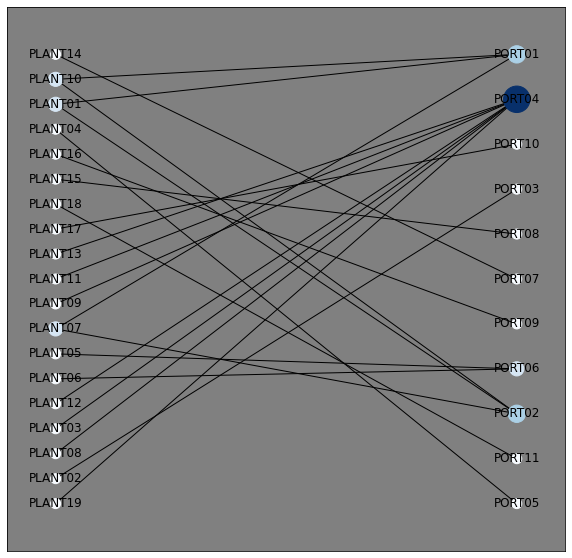

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor("Grey")

# specify layout for the graph
# layout = nx.bipartite_layout(plant_ports_graph, plant_ports["Plant Code"])

layout = nx.bipartite_layout(plant_ports_graph, plant_ports["Plant_Code"])

for i in layout:
    if i.startswith("PLANT"):
        layout[i][0] -= 0.1
    else:
        layout[i][0] += 0.1

# we want to map the degree of the node to a color/size
degrees = dict(plant_ports_graph.degree)
maps = [v*100 for v in degrees.values()]

# specify the color map
cmap = plt.cm.Blues

# keyword args that are the same for both functions
kwargs = {"pos":layout, "ax":ax}

nx.draw_networkx_nodes(plant_ports_graph, node_size=maps, node_color=maps, cmap=cmap, **kwargs)
nx.draw_networkx_edges(plant_ports_graph, **kwargs)
nx.draw_networkx_labels(plant_ports_graph, pos=layout)
plt.show()

In [19]:
# get starting and ending points of the edges and add them to the graph
layout = nx.bipartite_layout(plant_ports_graph, plant_ports["Plant_Code"])

edge_x = []
edge_y = []

for edge in plant_ports_graph.edges():
    x0, y0 = layout[edge[0]]
    x1, y1 = layout[edge[1]]
    
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#25488e'),
    hoverinfo='none',
    mode='lines')

# get coordinated of nodes and add them to the graph

node_x = []
node_y = []
for node in plant_ports_graph.nodes():
    x, y = layout[node]
    node_x.append(x)
    node_y.append(y)
    
maps = [v for v in degrees.values()]

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=maps,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_trace.text = [i + " Number of Links: " + str(degrees[i]) for i in degrees]

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Supply Chain',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[dict(text="Factories",
                     showarrow=False,
                     xref="paper", yref="paper",
                     x=0.005, y=-0.002 ),
                             dict(text="Ports",
                     showarrow=False,
                     xref="paper", yref="paper",
                     x=0.95, y=-0.002 )],
                xaxis=dict(showgrid=True, zeroline=False, showticklabels=True),
                yaxis=dict(showgrid=True, zeroline=False, showticklabels=True))
                )
fig

## Most facilities have only one connection to a port. Port 4 is potentially the most important one as it has the most connections to the warehouses.

Preparing the Order Table
The existing order table already contains a solution. We will delete those columns.

In [20]:
order_new = order_list.drop(columns=["Order_Date", "Origin_Port", "Carrier", "Plant_Code", "TPT", "Service_Level", "Ship_ahead_day_count", "Ship_Late_Day_count"])
order_new.set_index("Order_ID", inplace=True)
order_new.to_csv("order_new.csv")

Preparing Freight Table

In [21]:
freight_rates.drop(columns=["dest_port_cd", "Carrier type", "svc_cd"], inplace=True)
freight_rates.to_csv("FreightRates_mod.csv")

Problem Restrictions

In [22]:
# given a product id, return the plants that can produce this product.
def product_restriction(index):
    data = order_new.loc[index]
    product_id = data["Product_ID"]
    possible_plants = products_plants.loc[products_plants["Product_ID"] == product_id]
    return np.array(possible_plants["Plant_Code"])

# vmi restriction: check if a given customer has to be serviced by a specific facility, else return all facilities as possibilities.
def customer_restriction(index):
    data = order_new.loc[index]
    Customer_id = data["Customer"]
    possible_plants = vmi_plants.loc[vmi_plants["Customers"] == Customer_id]
    if list(possible_plants["Plant_Code"]) == []:
        return plant_ports["Plant_Code"].unique()
    else:
        return np.array(possible_plants["Plant_Code"])

# combine both the product and vmi restriction. There will be orders for which only one, or possibly even 0, facilities can fullfil it.
def check_order(Order_Id, length=True):
    if length:
        return len(np.intersect1d(customer_restriction(Order_Id), product_restriction(Order_Id)))
    else:
        return np.intersect1d(customer_restriction(Order_Id), product_restriction(Order_Id))

# under the restrictions above, we can calculate the number of facilities that can process a given order.
order_new["decision_space_size"] = np.array(list(map(check_order, order_new.index)))

In [23]:
order_new["decision_space_size"].value_counts()

1    6275
0    1045
4     982
2     785
3     127
5       1
Name: decision_space_size, dtype: int64

Ant Colony Optimization In nature, ants cooperate in finding resources by depositing pheromone along their traveled paths. Ant Colony Optimization is a metaheuristic inspired by this behavior.

Ants are responsible for applying a constructive algorithm to build solutions. After the solution is built, they might deposit pheromone on the components they employed. The amount of pheromone depends on the quality of the solution they found.

During the construction phase, the next component to be added to the solution is selected probabilistically. The probability pc for the selection of a component c takes into account the amount of pheromone τc deposited on that component by all the ants as well as a measure ηc of the cost of employing that component on a solution.

Let C be the set of components available to be selected at the current iteration. Let A be the set of ants. In Ant System (one of the most basic ACO variations) the following formula for the probability of selecting component c is used:

pc = τcαηcβ/Σc'∈Cτc'αηc'β

After the construction and an optional local search phase, pheromones are then updated:

τc ← (1-ρ)τc + Σa∈AΔτca,

where Δτca = Q/f(a) if c is used by ant a, 0 otherwise; and f(a) is the objective value of the solution built by ant a.

α, β, ρ, and Q are algorithm parameters.

Main Variations Ant System Explained above.

Max-Min Ant System Pheromone values are updated only by global or iteration best ants. There are upper and lower limits on the amount of pheromone of each component. Ant Colony System Pheromone values are updated only by global or iteration best ants. Local pheromone updates: Ants update component pheromones as soon as they are selected: τc ← (1-φ)τc + φτ0. The initial amount of pheromone on each component is τ0 and φ is an algorithm parameter. Pseudorandom proportional rule: In order to select the next component, an ant draws a random number q ∈ [0, 1]. If q ≤ q0, where q0 is an algorithm parameter, the next component will be the one that maximizes τcηcβ. Else, the classic rule is applied.

In [33]:
class Ant:
    """
    Single Ant
    Create a single ant with its properties
    :param int size: the dimension or length of the ant
    """
    uid = 0
    def __init__(self, size):
        self.uid = self.__class__.uid
        self.__class__.uid += 1

        self.size = size
        self.tourLength = np.inf
        self.tour = np.ones(self.size, dtype=np.int64)*-1
        self.visited = np.zeros(self.size, dtype=np.int64)

    def clone(self):
        """
        Returns a deep copy of the current Ant instance with a new UID
        """
        ant = Ant(len(self.tour))
        ant.tourLength = self.tourLength
        ant.tour = self.tour.copy()
        ant.visited = self.visited.copy()
        return ant

class ACO:
    """
    The Ant Colony Optimization metaheuristic
    :param cities: cities' coordinates
    :param ants: number of ants in the colony
    :param maxIter: maximum number of iterations of the algorithm
    :param alpha: the pheromone trail influence
    :param beta: the heuristic information influence
    :param rho: the pheromone evaporation parameter
    """
    def __init__(self, cities, ants = -1, maxIter = 500, alpha = 1.0, beta = 2.0, rho = 0.5):
        self.cities = cities
        self.ants = ants
        self.maxIter = maxIter
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.start = None
        self.initialize()

    def initialize(self):
        # initialize the problem
        self.n = len(self.cities)
        self.distMatrix = self.computeDistances(self.cities)
        self.nnList = self.computeNearestNeighbor(self.n,self.distMatrix)
        self.CNN = self.computeNNTourLength(self.n,self.distMatrix) # initial tour
        # initial the colony
        self.eta = 1.0 / (self.distMatrix + 0.1) # add a small constant to avoid zero
        self.iter = 0
        self.bestSoFarAnt = Ant(self.n)
        self.foundBest = 0
        self.restartBestAnt = Ant(self.n)
        self.restartFoundBest = 0
        self.colony = self.createColony(self.ants, self.n)
        self.pheromone = self.resetPheromone(self.ants/self.CNN)
        self.choiceInfo = self.computeChoiceInfo(self.pheromone)

    def computeDistances(self, cities):
        dim = len(cities)
        distMatrix = np.zeros((dim, dim))
        for i in range(dim):
            for j in range(dim):
                distMatrix[i][j] = distance(cities[i],cities[j])
        # Asign huge values to diagonal in distance matrix, making the distance
        # from a point to itself greater than the maximum
        rowMax = np.amax(distMatrix, axis=1) * MAXFACTOR
        return distMatrix + np.eye(dim) * rowMax

    def computeNearestNeighbor(self, dim, distMatrix):
        """
        Get the nearest-neighbor list of each city
        the nearest-neighbor list, nnList[i][r] gives the identifier(index)
        of the r-th nearest city to city i (i.e. nnList[i][r] = j)
        """
        nn = []
        for row in self.distMatrix:
            d = row.tolist()
            indices = np.lexsort((range(dim), d))
            nn.append(indices)
        return np.array(nn)

    def computeNNTourLength(self,dim, distMatrix):
        """
        A TSP tour generated by the nearest-neighbor heuristic
        """
        tour = np.ones(dim, dtype=np.int64)*-1
        visited = np.zeros(dim, dtype=np.int64)

        step = 0
        r = np.random.randint(0,dim) # initial to random city
        tour[step] = r
        visited[r] = 1
        while (step < dim-1):
            step+=1
            current = tour[step-1]
            next = dim-1
            minDist = np.inf
            for city in range(dim):
                if not visited[city]:
                    dist = distMatrix[current][city]
                    if dist < minDist:
                        next = city
                        minDist = dist
            tour[step] = next
            visited[next] = 1
        # return the tour length
        return self.computeTourLength(tour)

    def computeTourLength(self,tour):
        # tour no return to the start
        return sum(distance(self.cities[tour[i]],self.cities[tour[i+1]]) for i in range(len(tour)-1))
        # tour return to the start
        #return sum(distance(self.cities[tour[i]],self.cities[tour[i-1]]) for i in range(len(tour)))

    def createColony(self, numOfAnts, size):
        """Create a colony of ants according to the number of ants specified,"""
        colony = []
        for i in range(numOfAnts):
            colony.append(Ant(size))
        return np.array(colony)

    def resetPheromone(self, level=0.1):
        """Reset the pheromone to a default level"""
        pheromone = np.ones((self.n, self.n), dtype=np.float) * level
        return pheromone

    def computeChoiceInfo(self, pheromone):
        """
        Compute the choice information matrix using the pheromone and heuristic information.
        """
        return pheromone**self.alpha*self.eta**self.beta

    def run(self):
        progress = []
        t0 = time.clock()
        print("*** Running Ant Colony Optimization ***")
        while self.iter < self.maxIter:
            self.generateSolutions()
            self.updateStatistics()
            self.updatePheromone()
            self.iter += 1
            # console output
            lenValues = np.array([ant.tourLength for ant in self.colony])
            progress.append(np.amin(lenValues))
            stats = [self.iter,np.amax(lenValues),np.amin(lenValues),np.mean(lenValues),np.std(lenValues)]
            print("iter {} max {:.3f} min {:.3f} ave {:3f} var {:.3f}".format(stats[0], stats[1], stats[2], stats[3], stats[4]))
        t1 = time.clock()
        print("{} city tour with length {:.2f} meters in {:.3f} secs".format(len(self.cities), self.computeTourLength(self.bestSoFarAnt.tour), t1-t0))
        bestTour = [self.cities[i] for i in self.bestSoFarAnt.tour]
        return progress, bestTour

    def generateSolutions(self):
        """Construct valid solutions for the TSP."""
        step = 0
        # 1. Clear ants memory
        for ant in self.colony:
            for i in range(len(ant.visited)):
                ant.visited[i] = 0
        # 2. Assign an initial random city to each ant
        for ant in self.colony:
            r = np.random.randint(0, self.n)
            ant.tour[step] = r
            ant.visited[r] = 1
        # 3. Each ant constructs a complete tour
        while step < self.n-1:
            step += 1
            for k in range(self.ants):
                self.decisionRule(k,step)
        # 4. Move to initial city and compute each ant's tour length
        for ant in self.colony:
            ant.tourLength = self.computeTourLength(ant.tour)

    def decisionRule(self, k, i):
        """
        The ants apply the Ant System (AS) action choice rule eq.3.2
        :param int k: ant identifier
        :param int i: counter for construction step
        """
        c = self.colony[k].tour[i-1] # current city
        # create a roulette wheel, like in evolutionary computation
        # sum the probabilities of the cities not yet visited
        sumProp = 0.0
        selectProb = np.zeros(self.n, dtype=np.float)
        for j in range(self.n):
            if self.colony[k].visited[j]:
                selectProb[j] = 0.0 # if city has been visited, its probability is zero
            else:
                # assign a slice to the roulette wheel, proportional to the weight of the associated choice
                selectProb[j] = self.choiceInfo[c][j]
                sumProp += selectProb[j]

        # Spin the roulette wheel
        # Random number from the interval [0, sumProb], corresponding to a uniform distribution
        r = sumProp*np.random.random_sample()
        j = 0
        p = selectProb[j]
        while p < r:
            j += 1
            p += selectProb[j]

        self.colony[k].tour[i] = j
        self.colony[k].visited[j] = 1

    def updateStatistics(self):
        """
        Manage some statistical information about the trial, especially
        if a new best solution (best-so-far or restart-best) if found and
        adjust some parametyers if a new best solution is found
        """
        iterBestAnt = self.findBest()
        # Update best so far ant
        diff = self.bestSoFarAnt.tourLength - iterBestAnt.tourLength
        if diff > EPSILON:
            self.bestSoFarAnt = iterBestAnt.clone()
            self.restartBestAnt = iterBestAnt.clone()
            self.foundBest = self.iter
            self.restartFoundBest = self.iter

        # Update restart best ant
        diff = self.restartBestAnt.tourLength - iterBestAnt.tourLength
        if diff > EPSILON:
            self.restartBestAnt = iterBestAnt.clone()
            self.restartFoundBest = self.iter

    def updatePheromone(self):
        """
        Pheromone trail update
        Pheromone trail are evaporated and pheromones are deposited according to
        the rules defined by the various ACO agorithms
        """
        # decreases the values of the pheromone trails on all the arcs by a constant
        # factor rho. This uses matrix operation
        self.pheromone = self.pheromone*(1.0-self.rho)
        for ant in self.colony:
            # adds pheromone to the arcs belonging to the tours constructed by ant
            delta = 1.0 / ant.tourLength
            for i in range(self.n-1):
                j = ant.tour[i]
                k = ant.tour[i+1]
                self.pheromone[j][k] = self.pheromone[j][k] + delta
                self.pheromone[k][j] = self.pheromone[j][k]
        # compute the choice information matrix using the pheromone and heuristic information
        self.choiceInfo = self.computeChoiceInfo(self.pheromone)

    def findBest(self):
        """
        FInd the best ant object from the colony in the current iteration
        """
        best = self.colony[0]
        for ant in self.colony:
            if ant.tourLength < best.tourLength:
                best = ant.clone()
        return best

We can see that for most orders, there is only one facility that can handle the order. For ~1,000 there is no possible facility that can handle the order given our problem restrictions, we will exclude these orders from our further optimization problem.

# Assigning orders

Instead of using the specific rate for a carrier we will aggregate the rates for a given port. The main problem is that rates range from 0.03 to 128 which makes it hard to know the unit of measurement (e.g. €/kg or €/unit). Therefore I will average the rates for each port and use those as the costs.

In [24]:
freight_rates["rate"].describe()

count    1537.000000
mean        2.875135
std         4.590475
min         0.033200
25%         0.451200
50%         1.656800
75%         3.916800
max       128.027200
Name: rate, dtype: float64

In [25]:
ports_agg = freight_rates.groupby(["orig_port_cd"]).agg(avg_rate=("rate", np.mean))
# we will exclude orders that cannot be processed by any facility (i.e. where the decision space size == 0)
order_new = order_new.loc[order_new.decision_space_size != 0]
# return the possible plants that can process the order.
order_new["decision_space_plants"] = np.array((map(lambda x: check_order(x, length=False), order_new.index)))

def min_cost(dec_space):
    
    plant_port_cost = {}
    
    wh = wh_cost.copy()
    min_cost = np.inf
    
    for plant in dec_space:
        plant_port_cost[plant] = wh.loc[plant].iloc[0]
        port_price, port = find_best_port(plant)
        plant_port_cost[plant] += port_price
        
        if plant_port_cost[plant] < min_cost:
            min_cost = plant_port_cost[plant]
            best_plant = plant
            best_port = port
            best_port_price = port_price
        
    return min_cost, best_plant, best_port_price, best_port

# given a port and the order specifications return the carrier that can handle the product at the best price.
def find_best_port(plant_id):
    # choose the ports that have a connection to the given plant and then find the port with the lowest freight rate
    possible_ports = plant_ports.loc[(plant_ports.Plant_Code == plant_id) & (plant_ports.Port != "PORT01"), "Port"]
    possible_ports = ports_agg.loc[possible_ports]
    return possible_ports.loc[possible_ports["avg_rate"] == min(possible_ports["avg_rate"])].iloc[0]["avg_rate"], possible_ports.loc[possible_ports["avg_rate"] == min(possible_ports["avg_rate"])].iloc[0].name

order_new["decision"] = order_new["decision_space_plants"].apply(min_cost)

In [26]:
order_new["decision"]

Order_ID
1.447296e+09    (4.7563741745191, PLANT16, 2.8365666666666662,...
1.447158e+09    (4.7563741745191, PLANT16, 2.8365666666666662,...
1.447139e+09    (4.7563741745191, PLANT16, 2.8365666666666662,...
1.447364e+09    (4.7563741745191, PLANT16, 2.8365666666666662,...
1.447364e+09    (4.7563741745191, PLANT16, 2.8365666666666662,...
                                      ...                        
1.447372e+09        (10.321903518927222, PLANT02, 9.8444, PORT03)
1.447372e+09        (10.321903518927222, PLANT02, 9.8444, PORT03)
1.447328e+09        (10.321903518927222, PLANT02, 9.8444, PORT03)
1.447358e+09        (10.321903518927222, PLANT02, 9.8444, PORT03)
1.447287e+09        (10.321903518927222, PLANT02, 9.8444, PORT03)
Name: decision, Length: 8170, dtype: object

In [27]:
decision = order_new["decision"].tolist()
lenn = len(decision)
min_cost_list = []
for i in range(lenn):
  min_cost_list.append(decision[i][0])
best_plant_list = []
for i in range(lenn):
  best_plant_list.append(decision[i][1])
best_port_price_list = []
for i in range(lenn):
  best_port_price_list.append(decision[i][2])
best_port_list = []
for i in range(lenn):
  best_port_list.append(decision[i][3])

decision_dataframe = pd.DataFrame(
    {'min_cost': min_cost_list,
     'best_plant': best_plant_list,
     'best_port_price': best_port_price_list,
     'best_port': best_port_list,
    })

In [28]:
decision_dataframe

,min_cost,best_plant,best_port_price,best_port
0,4.756374,PLANT16,2.836567,PORT09
1,4.756374,PLANT16,2.836567,PORT09
2,4.756374,PLANT16,2.836567,PORT09
3,4.756374,PLANT16,2.836567,PORT09
4,4.756374,PLANT16,2.836567,PORT09
...,...,...,...,...
8165,10.321904,PLANT02,9.844400,PORT03
8166,10.321904,PLANT02,9.844400,PORT03
8167,10.321904,PLANT02,9.844400,PORT03
8168,10.321904,PLANT02,9.844400,PORT03


In [30]:
path = '/content/drive/MyDrive/Bachelor Project/decision.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  decision_dataframe.to_csv('decision.csv')

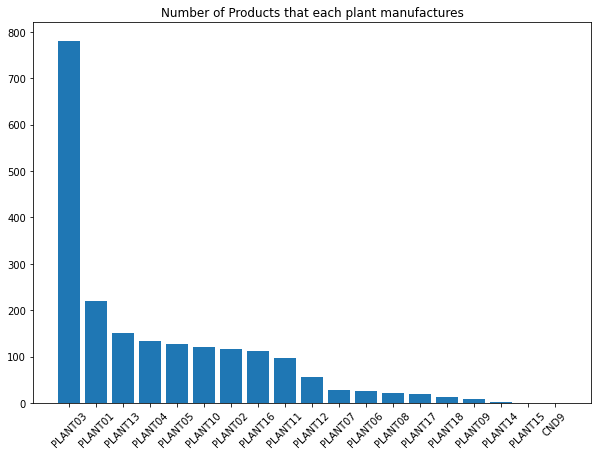

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
plt.xticks(rotation=45)
plant_counts = pd.DataFrame(products_plants["Plant_Code"].value_counts())
ax.bar(plant_counts.index, plant_counts["Plant_Code"])
plt.title("Number of Products that each plant manufactures")
plt.show()

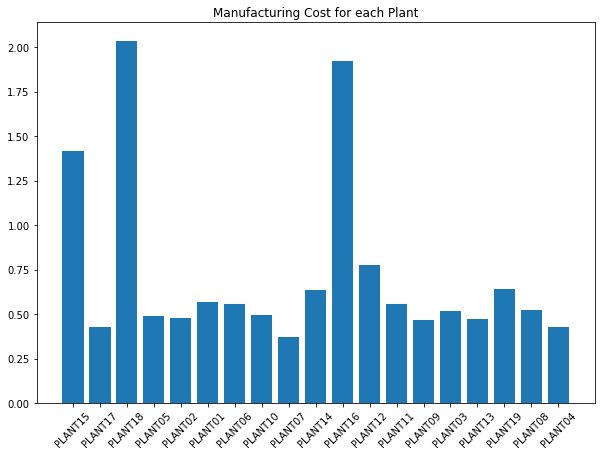

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
plt.xticks(rotation=45)
ax.bar(wh_cost.index, wh_cost["Cost/unit"])
plt.title("Manufacturing Cost for each Plant")
plt.show()